Anggota Kelompok :
1. Buala Leonardo Hulu
2. M.Furqan Fahraby
3. Reno Butar Butar

**Naive Bayes**

Naive Bayes Classifier merupakan salah satu metode machine learning yang memanfaatkan perhitungan probabilitas dan statistik. Metode ini dikemukakan oleh ilmuwan Inggris yaitu Thomas Bayes untuk memprediksi probabilitas di masa depan berdasarkan pengalaman di masa sebelumnya.

Naive Bayes juga ada beberapa metode seperti gaussian, multinomial, complement, bernoulli, dan categorical naive bayes.

**Complement Naive Bayes (CNB)**

CNB adalah adaptasi dari algoritma multinomial naive Bayes (MNB) standar yang sangat cocok untuk set data yang tidak seimbang. Secara khusus, CNB menggunakan statistik dari komplemen setiap kelas untuk menghitung bobot model. Para penemu CNB menunjukkan secara empiris bahwa estimasi parameter untuk CNB lebih stabil daripada MNB. Selanjutnya, CNB secara teratur mengungguli MNB (seringkali dengan margin yang cukup besar) pada tugas klasifikasi teks. Rumus dari ini terdapat di link ini 
[https://scikit-learn.org/stable/modules/naive_bayes.html/](https://scikit-learn.org/stable/modules/naive_bayes.html/)

Analisis cara kerja nya pada tugas kelompok ini adalah :

1. Mengambil data latih sebanyak 70% dan data uji 30%. 
2. Kelompok ini menggunakan library complement naive bayes.
3. mendapatkan akurasi sebesar 61,2%.

In [0]:
#import library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#mengambil dataset yang diberikan di classroom
!wget -O kc_house_data.csv https://raw.githubusercontent.com/Jonasyao/Machine-Learning-Specialization-University-of-Washington-/master/Regression/Assignment_four/kc_house_data.csv

--2019-12-07 11:03:15--  https://raw.githubusercontent.com/Jonasyao/Machine-Learning-Specialization-University-of-Washington-/master/Regression/Assignment_four/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 368640 (360K) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>] 360.00K  --.-KB/s    in 0.02s   

2019-12-07 11:03:15 (15.8 MB/s) - ‘kc_house_data.csv’ saved [368640/368640]



In [3]:
df = pd.read_csv("kc_house_data.csv")

#melihat dataset yang diberikan tadi
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [4]:
#menghitung korelasi nya
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.020586,0.016160,0.006245,0.006509,-0.119387,0.003711,-0.010812,0.026990,-0.040796,0.018157,-0.006035,0.023770,0.027312,0.011153,-0.002739,0.009330,-0.010377,-0.007233,-0.148569
price,0.020586,1.000000,0.292687,0.525410,0.705045,0.074343,0.266345,0.366539,0.443547,0.053563,0.654117,0.599060,0.348385,0.037089,0.122829,-0.054016,0.301174,0.017117,0.607973,0.100527
bedrooms,0.016160,0.292687,1.000000,0.524129,0.563356,0.019957,0.219842,-0.017281,0.071038,0.008733,0.377168,0.464938,0.302777,0.154266,0.021754,-0.141000,-0.002312,0.097718,0.396535,0.026756
bathrooms,0.006245,0.525410,0.524129,1.000000,0.760447,0.051719,0.483868,0.098275,0.192740,-0.084969,0.671816,0.682315,0.311458,0.469411,0.051398,-0.210420,0.029737,0.224612,0.611148,0.103767
sqft_living,0.006509,0.705045,0.563356,0.760447,1.000000,0.116406,0.388018,0.142087,0.304258,-0.032476,0.774177,0.866858,0.463595,0.310565,0.043889,-0.193646,0.074484,0.212006,0.775554,0.188285
sqft_lot,-0.119387,0.074343,0.019957,0.051719,0.116406,1.000000,-0.009937,0.049576,0.093349,0.008939,0.065752,0.138228,-0.012361,0.039262,-0.014342,-0.121655,-0.071822,0.210060,0.157720,0.734030
floors,0.003711,0.266345,0.219842,0.483868,0.388018,-0.009937,1.000000,0.047538,0.029217,-0.226346,0.453994,0.574209,-0.242835,0.398264,0.034701,-0.089467,0.040480,0.188301,0.333560,0.014624
waterfront,-0.010812,0.366539,-0.017281,0.098275,0.142087,0.049576,0.047538,1.000000,0.444111,0.036521,0.096082,0.114460,0.081348,-0.003530,0.068301,0.020302,-0.007285,-0.044505,0.099961,0.046696
view,0.026990,0.443547,0.071038,0.192740,0.304258,0.093349,0.029217,0.444111,1.000000,0.069877,0.232274,0.168941,0.309547,-0.056086,0.090716,0.077557,0.010558,-0.099549,0.284928,0.059748
condition,-0.040796,0.053563,0.008733,-0.084969,-0.032476,0.008939,-0.226346,0.036521,0.069877,1.000000,-0.108518,-0.138635,0.181297,-0.311377,-0.078634,0.004461,-0.019649,-0.119574,-0.076085,0.010200


In [0]:
#memilih dataset yang fitur nya di drop yang tidak berpengaruh
df = df.drop(['id','date','sqft_lot15','sqft_lot','zipcode','lat','long','yr_built','yr_renovated'],axis = 1)

In [0]:
#melakukan pengisian value yang kosong seperti dilihat di tabel diatas dengan cara ratarata
df['sqft_living15'] = df['sqft_living15'].fillna(df['sqft_living15'].mean())
df['sqft_living15'] = round(df['sqft_living15'])

In [7]:
#mengecek dan melihat dataset kembali
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,3,7,1180,0,1340.0
1,538000.0,3,2.25,2570,2.0,0,0,3,7,2170,400,1690.0
2,180000.0,2,1.00,770,1.0,0,0,3,6,770,0,2720.0
3,604000.0,4,3.00,1960,1.0,0,0,5,7,1050,910,1360.0
4,510000.0,3,2.00,1680,1.0,0,0,3,8,1680,0,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3160,485000.0,3,2.50,1840,1.0,0,1,3,8,1340,500,1970.0
3161,780000.0,3,1.50,1620,1.0,0,2,4,8,1620,0,2440.0
3162,720000.0,2,1.50,1840,1.0,0,2,3,8,1340,500,1880.0
3163,415000.0,3,1.00,1360,1.0,0,0,3,7,1360,0,2040.0


In [8]:
#melakukan inisiasi a untuk menyimpan dataset "price"
x = df.price
#membuat suatu wadah variabel mean untuk menghitung rata rata pada dataset "price"
mean = np.mean(x)
#membuat wadah standar deviasi untuk distribusi data agar terbagi dengan rata
std = np.std(x)
#membuat wadah min untuk nilai minimal pada dataset "price"
min = np.min(x)
#membuat wadah max untuk nilai maksimal pada dataset "price"
max = np.max(x)
print(mean)
print(std)
print(min)
print(max)

535418.2906793049
380781.2987979193
75000.0
5350000.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


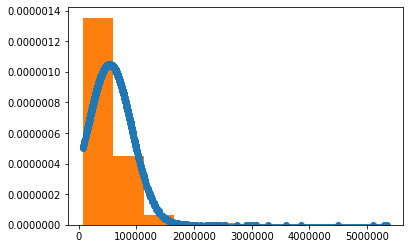

In [9]:
import numpy as np
import scipy.stats as stats
import pylab as pl
#inisiasi h untuk mengurutkan dataset "price"
h = sorted(x)
#inisiasi fit untuk menggeser distribusi
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
#plot untuk gambar sesuai dengan data yang telah diurutkan dan menempatkan histogram yang sesuai
pl.plot(h,fit,'-o')
#menggambar histogram untuk data yang sudah diurutkan 
pl.hist(h,normed=True)  
#menampilkan histogram 
pl.show()                   

In [10]:
#menampilkan jumlah baris untuk dataset "price" kurang dari sama dengan 525000
np.sum(df['price'] <= 525000)

1972

In [11]:
#menampilkan jumlah baris untuk dataset "price" lebih dari 525000
np.sum(df['price'] > 525000)

1193

In [0]:
#melakukan pelabelan dengan nilai "price" kurang dari sama dengan 525000 diberi label 1, sedangkan jika lebih dari 525000 akan diberi label 0
def conditions(x):
    if (x['price'] <= 525000):
        return 1
    else:
        return 0

In [0]:
#menggabungkan dataset nya
df['label'] = df.apply(conditions, axis=1)

In [0]:
#menyimpan dataset yang telah berlabel
df['label'] = df['label']

In [15]:
#menampilkan dataset
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,label
0,221900.0,3,1.00,1180,1.0,0,0,3,7,1180,0,1340.0,1
1,538000.0,3,2.25,2570,2.0,0,0,3,7,2170,400,1690.0,0
2,180000.0,2,1.00,770,1.0,0,0,3,6,770,0,2720.0,1
3,604000.0,4,3.00,1960,1.0,0,0,5,7,1050,910,1360.0,0
4,510000.0,3,2.00,1680,1.0,0,0,3,8,1680,0,1800.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,485000.0,3,2.50,1840,1.0,0,1,3,8,1340,500,1970.0,1
3161,780000.0,3,1.50,1620,1.0,0,2,4,8,1620,0,2440.0,0
3162,720000.0,2,1.50,1840,1.0,0,2,3,8,1340,500,1880.0,0
3163,415000.0,3,1.00,1360,1.0,0,0,3,7,1360,0,2040.0,1


In [0]:
#mendrop fitur price
df = df.drop(['price'] ,axis=1)

In [17]:
#menampilkan dataset nya kembali
df

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,label
0,3,1.00,1180,1.0,0,0,3,7,1180,0,1340.0,1
1,3,2.25,2570,2.0,0,0,3,7,2170,400,1690.0,0
2,2,1.00,770,1.0,0,0,3,6,770,0,2720.0,1
3,4,3.00,1960,1.0,0,0,5,7,1050,910,1360.0,0
4,3,2.00,1680,1.0,0,0,3,8,1680,0,1800.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3160,3,2.50,1840,1.0,0,1,3,8,1340,500,1970.0,1
3161,3,1.50,1620,1.0,0,2,4,8,1620,0,2440.0,0
3162,2,1.50,1840,1.0,0,2,3,8,1340,500,1880.0,0
3163,3,1.00,1360,1.0,0,0,3,7,1360,0,2040.0,1


In [0]:
from sklearn import metrics
from sklearn.naive_bayes import ComplementNB

In [0]:
#menampilkan fitur
feature = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view' , 'condition' , 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15']
kelas = ['label']
#inisiasi a yang berisi fitur
a = df[feature] 
#inisiasi b yang berisi kelas
b = df[kelas]

In [20]:
a

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15
0,3,1.00,1180,1.0,0,0,3,7,1180,0,1340.0
1,3,2.25,2570,2.0,0,0,3,7,2170,400,1690.0
2,2,1.00,770,1.0,0,0,3,6,770,0,2720.0
3,4,3.00,1960,1.0,0,0,5,7,1050,910,1360.0
4,3,2.00,1680,1.0,0,0,3,8,1680,0,1800.0
...,...,...,...,...,...,...,...,...,...,...,...
3160,3,2.50,1840,1.0,0,1,3,8,1340,500,1970.0
3161,3,1.50,1620,1.0,0,2,4,8,1620,0,2440.0
3162,2,1.50,1840,1.0,0,2,3,8,1340,500,1880.0
3163,3,1.00,1360,1.0,0,0,3,7,1360,0,2040.0


In [21]:
b

,label
0,1
1,0
2,1
3,0
4,1
...,...
3160,1
3161,0
3162,0
3163,1


In [0]:
#menentukan data latih dengan fitur yang berlokasi pada baris ke-950 sampai dengan baris ke-3165
x_latih = a.iloc[950:3165]
#menentukan data latih dengan kelas yang berlokasi pada baris ke-950 sampai dengan baris ke-3165
y_latih = b.iloc[950:3165]
#menentukan data uji dengan fitur yang berlokasi pada baris ke-0 sampai dengan baris ke-950
x_uji = a.iloc[0:950]
#menentukan data uji dengan kelas yang berlokasi pada baris ke-0 sampai dengan baris ke-950
y_uji = b.iloc[0:950]

In [23]:
from sklearn.naive_bayes import ComplementNB

#inisiasi cnb yang berisi klasifikasi Complement menggunakan library Complement Naive Bayes
cnb = ComplementNB()

#melatih model dengan menggunakan data latih
x = cnb.fit(x_latih, y_latih)

#memprediksi respons untuk data uji
y_prediksi = cnb.predict(x_uji)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
x_latih

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15
950,5,1.00,1410,1.5,0,0,3,6,1410,0,1360.0
951,3,1.75,1330,1.0,0,0,3,8,1330,0,2600.0
952,3,1.00,1490,1.0,0,0,3,7,1150,340,1730.0
953,3,2.50,2020,3.0,0,3,3,8,2020,0,1920.0
954,4,2.50,3130,2.0,0,0,3,10,3130,0,2840.0
...,...,...,...,...,...,...,...,...,...,...,...
3160,3,2.50,1840,1.0,0,1,3,8,1340,500,1970.0
3161,3,1.50,1620,1.0,0,2,4,8,1620,0,2440.0
3162,2,1.50,1840,1.0,0,2,3,8,1340,500,1880.0
3163,3,1.00,1360,1.0,0,0,3,7,1360,0,2040.0


In [26]:
y_uji

,label
0,1
1,0
2,1
3,0
4,1
...,...
945,1
946,1
947,0
948,1


In [27]:
y_prediksi

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

In [0]:
#mengunduh data uji dengan format file .csv
from google.colab import files
y_uji.to_csv('y_uji.csv') 
files.download('y_uji.csv')

In [0]:
prediksi = pd.DataFrame(y_prediksi, columns= ['Prediksi'])

In [30]:
prediksi

,Prediksi
0,1
1,0
2,1
3,0
4,1
...,...
945,1
946,0
947,1
948,1


In [0]:
#mengunduh data prediksi dengan format file .csv
from google.colab import files
prediksi.to_csv('prediksi.csv') 
files.download('prediksi.csv')

In [0]:
#menggabungkan tabel y_uji (berisi label pada data test) dan tabel prediksi (berisi label prediksi yang dihasilkan oleh Complement Naive Bayes) dengan tujuan untuk mengetahuin data mana saja yang salah diprediksi dan yang benar diprediksi
testing = pd.concat([y_uji, prediksi], axis=1)


In [36]:
testing

,label,Prediksi
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
945,1,1
946,1,0
947,0,1
948,1,1


In [0]:
#mengunduh data label test dan hasil prediksi Complement Naive Bayes dengan format file .csv
from google.colab import files
testing.to_csv('testing.csv') 
files.download('testing.csv')

In [41]:
#menampilkan tabel yang salah hasil prediksi oleh Complement Naive Bayes (Menghasilkan sebanyak 162 data dari 633 data)
error = testing.loc[testing['label'] != testing['Prediksi']] 
error

,label,Prediksi
8,1,0
11,1,0
14,0,1
20,1,0
27,0,1
...,...,...
940,0,1
942,0,1
946,1,0
947,0,1


In [0]:
#mengunduh data yang salah dalam prediksi Complement Naive Bayes dengan format file .csv
from google.colab import files
error.to_csv('error.csv') 
files.download('error.csv')

In [0]:
#menampilkan tabel yang benar hasil prediksi oleh Complement Naive Bayes
correct = testing.loc[testing['label'] == testing['Prediksi']] 

In [46]:
correct

,label,Prediksi
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
941,1,1
943,0,0
944,0,0
945,1,1


In [0]:
#mengunduh data yang benar dalam prediksi Complement Naive Bayes dengan format file .csv
from google.colab import files
correct.to_csv('correct.csv') 
files.download('correct.csv')

In [50]:
#Nilai akurasi
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_uji, y_prediksi)
accuracy

0.6126315789473684